<a href="https://colab.research.google.com/github/Jahir0513/Estad-stica-Multivariada/blob/main/Laboratorio_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

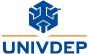

#Universidad del Desarrollo Empresarial y Pedagógico
#Maestria en Ciencia de datos
#Materia Visualizacion de datos
#Laboratorio 4
#Alumno: Jahir Aburto Viveros
#Profesor: Asdrúbal López Chau
#Fecha: 11 Julio 2024

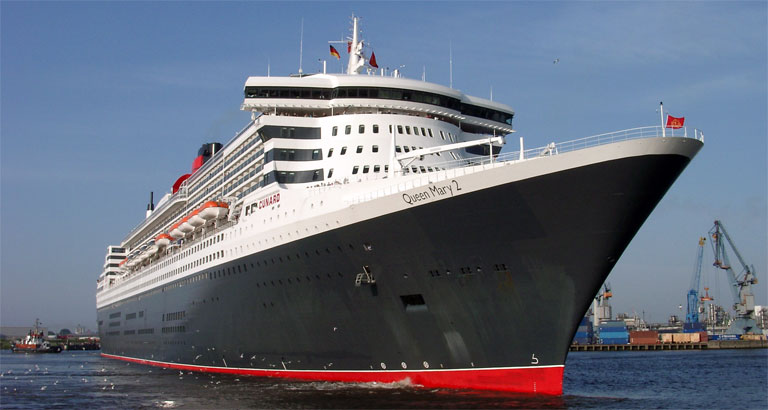

#El RMS Titanic fue un transatlántico británico, el mayor barco de pasajeros del mundo al finalizar su construcción, que naufragó en las aguas del océano Atlántico durante la noche del 14 y la madrugada del 15 de abril de 1912, mientras realizaba su viaje inaugural desde Southampton a Nueva York, tras chocar con un iceberg. En el hundimiento murieron 1496 personas de las 2208 que iban a bordo, lo que convierte a esta catástrofe en uno de los naufragios más mortales de la historia ocurridos en tiempos de paz.



In [3]:
# Usaremos la biblioteca pandas
import pandas as pd   # TO DO
import matplotlib
from matplotlib import pyplot as plt #para graficar
import numpy as np #para calculos numericos
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
paleta=sns.color_palette("bright")
paleta

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

In [7]:
titanic=sns.load_dataset("titanic")
#titanic=titanic.dropna()
titanic.columns=['Sobrevivió', 'pclass', 'Sexo', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']
titanic.head()

,Sobrevivió,pclass,Sexo,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Narrativa

El catastrófico viaje del Titanic nos ofrece un panorama complejo y conmovedor de una de las tragedias marítimas más famosas de la historia. Con 644 pasajeros embarcando desde Southampton, el puerto más concurrido, la travesía prometía diversidad y aventura. Este grupo demográfico, compuesto por 441 hombres y 203 mujeres, reflejaba una notable diversidad, con una mayoría de adultos preparados para un viaje transatlántico.

La venta de boletos mostró patrones interesantes: Southampton lideró con 644 boletos vendidos, seguido por Cherbourg con 168 y Queenstown con 72. En primera y segunda clase, hombres y mujeres contribuyeron de manera equitativa, mientras que en tercera clase predominaron los hombres jóvenes, especialmente en Southampton. La preferencia por boletos de primera clase entre los hombres, a excepción de Cherbourg donde las mujeres dominaron, mostró una inclinación hacia el lujo y el estatus, con edades medias rondando los 40 años.

Los boletos de segunda clase también fueron predominantemente adquiridos por hombres, salvo en Queenstown. La tercera clase atrajo a hombres jóvenes entre 20 y 30 años en Southampton y Queenstown. El perfil general de los pasajeros mostró una mayoría de adultos mayores de 20 años, con una ligera sobrerrepresentación de hombres, consistente en los tres puertos de embarque.

En cuanto a los sobrevivientes, Southampton emergió como el puerto con más sobrevivientes, aunque Cherbourg y Queenstown destacaron por una mayor proporción de mujeres sobrevivientes, sugiriendo una priorización en la evacuación. Los sobrevivientes que viajaban acompañados, especialmente mujeres y niños, tuvieron mayores oportunidades de sobrevivir. Los hombres mayores de 25 años que viajaban solos enfrentaron mayores desafíos para asegurar un lugar en los botes salvavidas.

Cada detalle del viaje del Titanic no solo revela las decisiones individuales en un momento crítico, sino también las complejidades sociales y demográficas que definieron esta tragedia histórica de proporciones monumentales.





<ipython-input-8-789272b6f338>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='embarked',
<ipython-input-8-789272b6f338>:5: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  ax = sns.countplot(x='embarked',


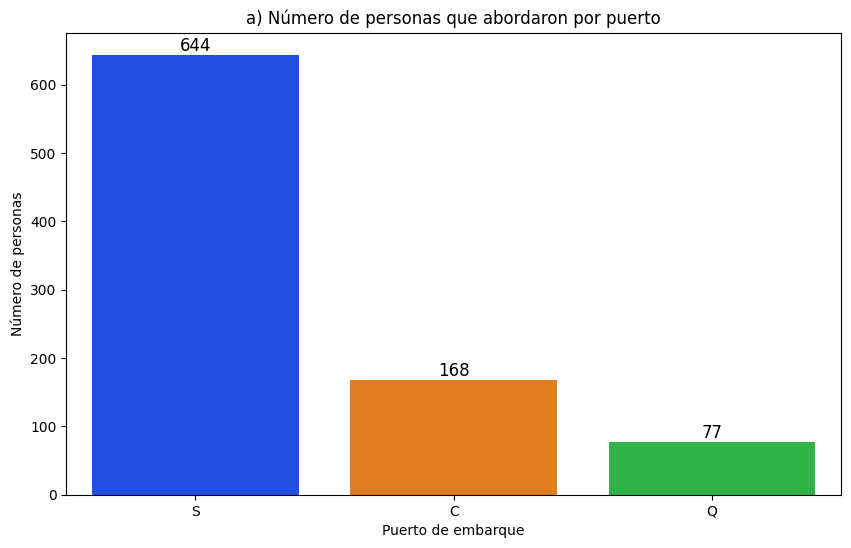

In [8]:
total_passengers = len(titanic)


plt.figure(figsize=(10, 6))
ax = sns.countplot(x='embarked',
                   data=titanic,
                   palette=paleta)

plt.title('a) Número de personas que abordaron por puerto')
plt.xlabel('Puerto de embarque')
plt.ylabel('Número de personas')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height-10),
                ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

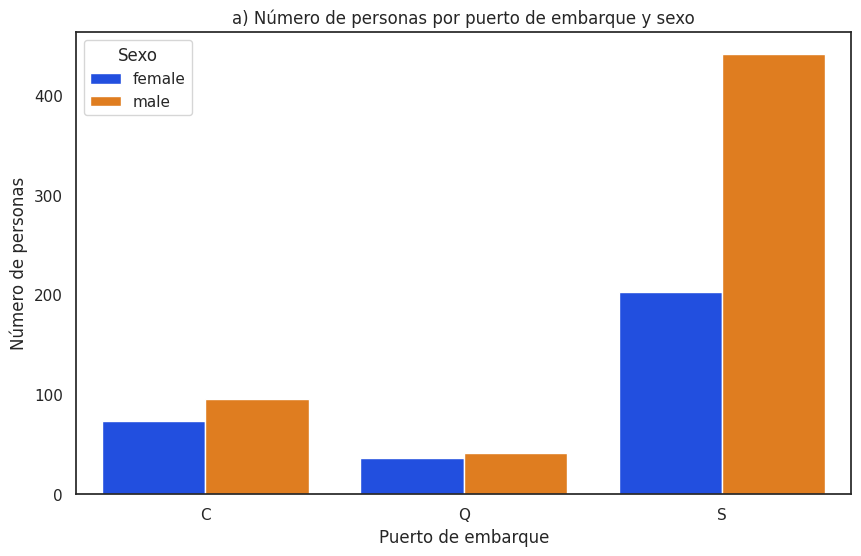

In [23]:
total_passengers = len(titanic)

# Calcular la frecuencia absoluta de personas por puerto y sexo
embarked_counts = titanic.groupby(['embarked', 'Sexo']).size().reset_index(name='frecuencia')

# Definir la paleta de colores (puedes personalizarla según tu preferencia)
paleta = 'bright'

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=embarked_counts,
    x='embarked',
    y='frecuencia',
    hue='Sexo',
    palette=paleta,
)

plt.title('a) Número de personas por puerto de embarque y sexo')
plt.xlabel('Puerto de embarque')
plt.ylabel('Número de personas')

plt.show()

<ipython-input-24-9afbe72011e5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=titanic,


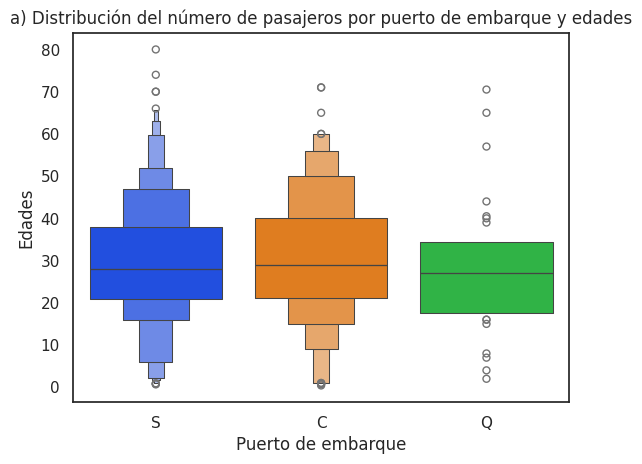

In [24]:
# ¿En cuál puerto abordaron más personas? y por edades
sns.boxenplot(data=titanic,
              x="embarked",
              y="age",
              palette=paleta)

plt.title('a) Distribución del número de pasajeros por puerto de embarque y edades')
plt.xlabel('Puerto de embarque')
plt.ylabel('Edades')
plt.show()




a. ¿En cuál puerto abordaron más personas?

Cuando se analiza el puerto del embarque de Southampton fue el que mas tuvo numero de pasajeros con un total de 644 siento dividido por genero, estos nos arrojan un total de 441 del genero masculino mientras que el 203 restante, era personas del género femenino.



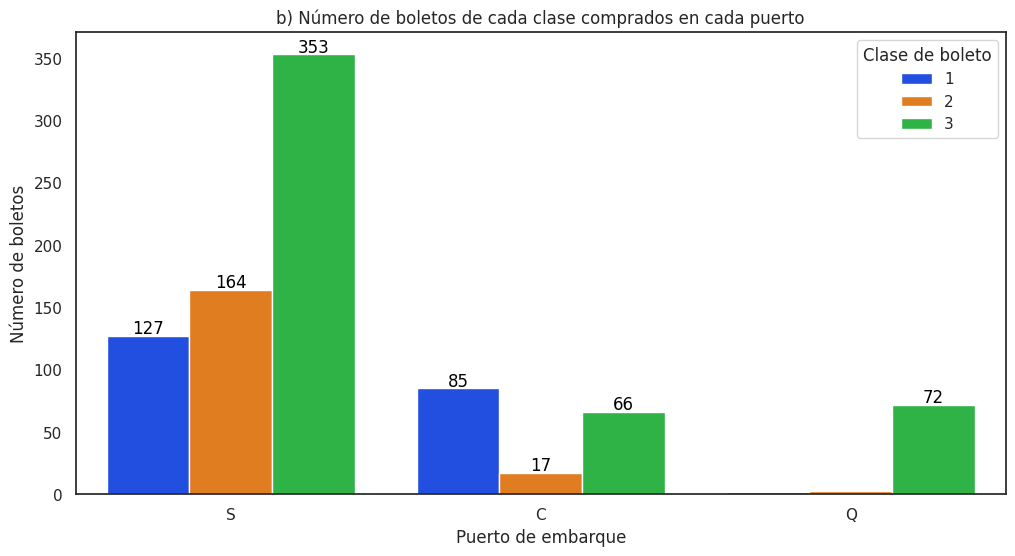

In [25]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='embarked', hue='pclass', data=titanic, palette=paleta)

plt.title('b) Número de boletos de cada clase comprados en cada puerto')
plt.xlabel('Puerto de embarque')
plt.ylabel('Número de boletos')
plt.legend(title='Clase de boleto')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
      ax.annotate(f'{int(height)}',
                  (p.get_x() + p.get_width() / 2, height-7),
                  ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5),
                  textcoords='offset points')

plt.show()

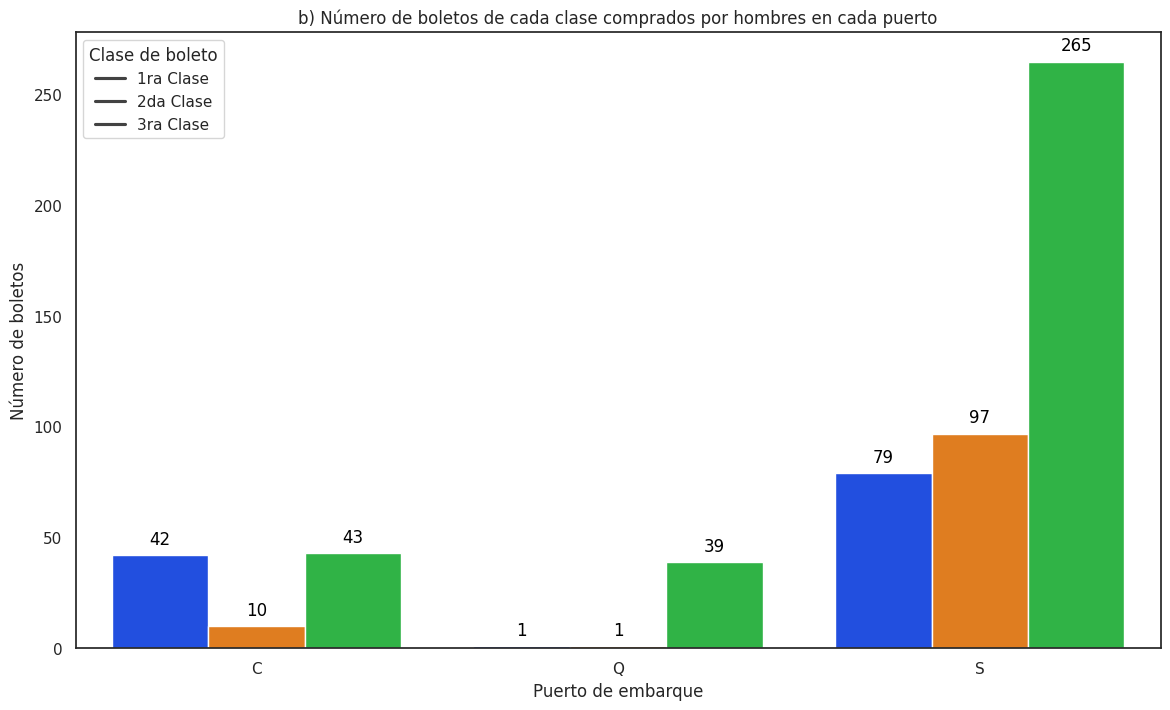

In [28]:
male_data = titanic[titanic['Sexo'] == 'male']
male_class_counts = male_data.groupby(['embarked', 'pclass']).size().reset_index(name='count')




plt.figure(figsize=(14, 8))
ax=sns.barplot(x='embarked', y='count', hue='pclass', data=male_class_counts, palette='bright')
plt.title('b) Número de boletos de cada clase comprados por hombres en cada puerto')
plt.xlabel('Puerto de embarque')
plt.ylabel('Número de boletos')
plt.legend(title='Clase de boleto', labels=['1ra Clase', '2da Clase', '3ra Clase'])
for p in ax.patches:
    height = p.get_height()
    if height > 0:
      ax.annotate(f'{int(height)}',
                  (p.get_x() + p.get_width() / 2, height+0),
                  ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5),
                  textcoords='offset points')
plt.show()



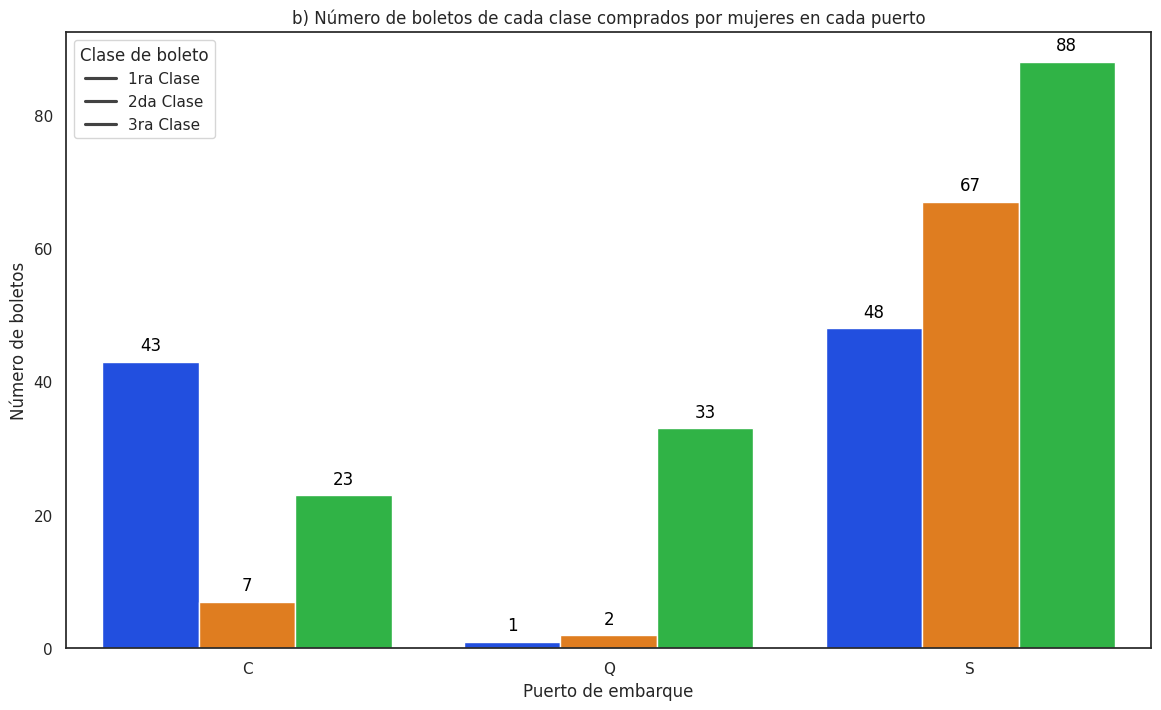

In [29]:
female_data = titanic[titanic['Sexo'] == 'female']

female_class_counts = female_data.groupby(['embarked', 'pclass']).size().reset_index(name='count')


plt.figure(figsize=(14, 8))
ax=sns.barplot(x='embarked', y='count', hue='pclass', data=female_class_counts, palette='bright')
plt.title('b) Número de boletos de cada clase comprados por mujeres en cada puerto')
plt.xlabel('Puerto de embarque')
plt.ylabel('Número de boletos')
plt.legend(title='Clase de boleto', labels=['1ra Clase', '2da Clase', '3ra Clase'])
for p in ax.patches:
    height = p.get_height()
    if height > 0:
      ax.annotate(f'{int(height)}',
                  (p.get_x() + p.get_width() / 2, height+0),
                  ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5),
                  textcoords='offset points')
plt.show()

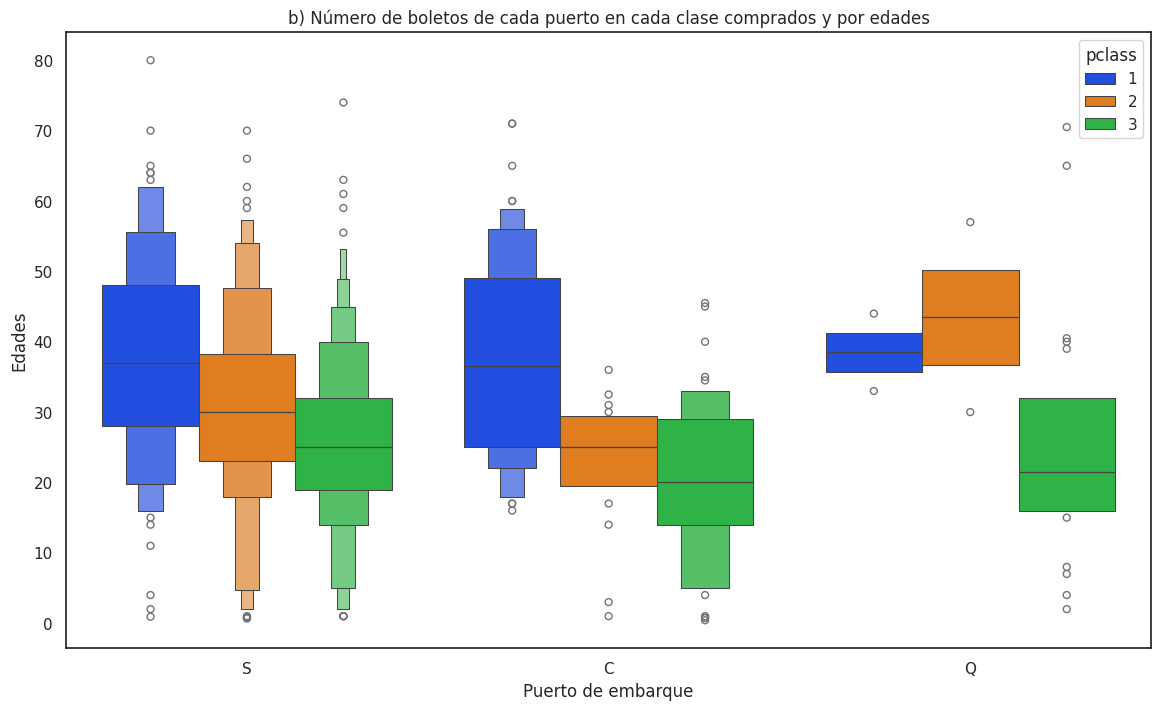

In [30]:
plt.figure(figsize=(14, 8))
sns.boxenplot(data=titanic,
              x="embarked",
              y="age",
              hue="pclass", palette=paleta)

plt.title('b) Número de boletos de cada puerto en cada clase comprados y por edades')
plt.xlabel('Puerto de embarque')
plt.ylabel('Edades')

plt.show()




b. ¿Cuántos boletos de cada clase se compraron en cada puerto?

En total, Southampton vendió un total de boletos de 644, en total de todas las clases, en segundo lugar que más vendió fue de 168 en la enbacación de Cherbourg y por ultimo, Queenstown que obtuvo unicamente 72 vendidos.

Por otro lado, ek genero da como resultado que tanto hombre como mujeres no cuentan con mucha diferencia en la compra de boletos de primera y segunda clase, mientras que en la tarcera clase, las personas del sexo masculino fueron quienes compraron más boletos.

Por ultimo, las edades las personas que más compraron boletos, fueron menores a 30 años generalmente hablando, es decir, tanto hombres como mujeres.



<ipython-input-31-541fed421b78>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Sexo', data=first_class, palette=paleta)


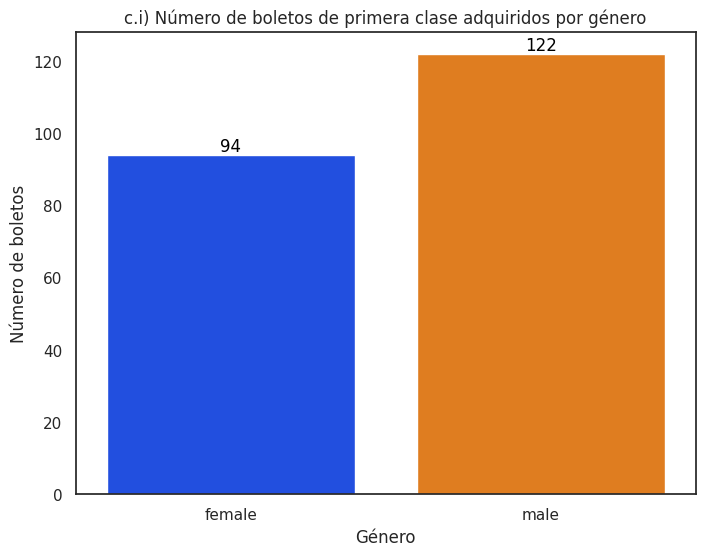

In [31]:
first_class = titanic[titanic['pclass'] == 1]

sns.set(style="white")

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Sexo', data=first_class, palette=paleta)

plt.title('c.i) Número de boletos de primera clase adquiridos por género')
plt.xlabel('Género')
plt.ylabel('Número de boletos')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height-2),
                ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

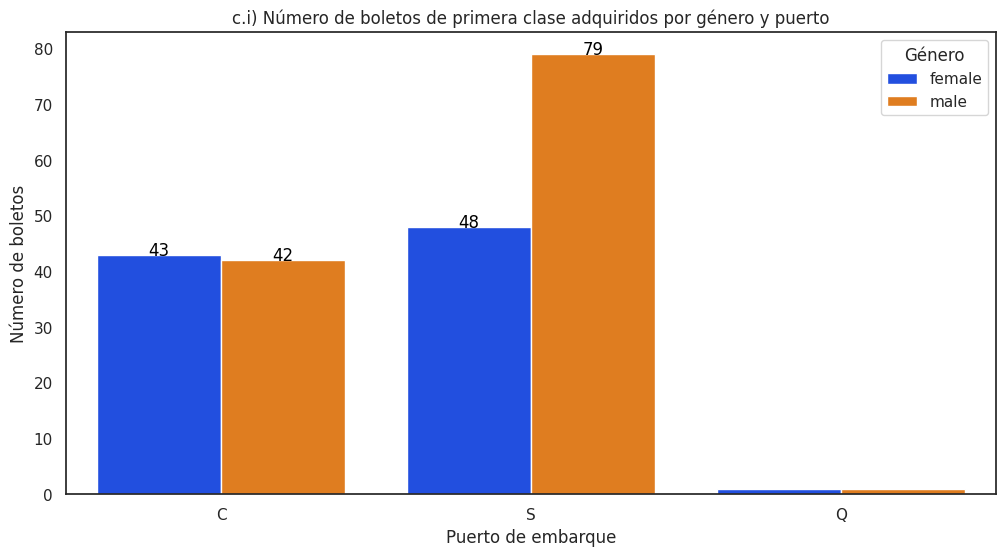

In [32]:
plt.figure(figsize=(12, 6))
ax=sns.countplot(x='embarked', hue='Sexo', data=first_class, palette=paleta)

plt.title('c.i) Número de boletos de primera clase adquiridos por género y puerto',)
plt.xlabel('Puerto de embarque')
plt.ylabel('Número de boletos')
plt.legend(title='Género')
# Añadir etiquetas con la frecuencia absoluta de boletos
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height-2),
                ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()




<ipython-input-33-221baa5ce04b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=first_class,


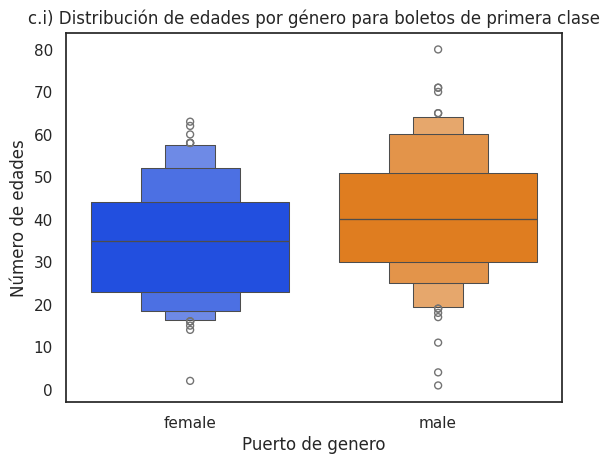

In [33]:
sns.boxenplot(data=first_class,
              x="Sexo",
              y="age",
              palette=paleta)

plt.title('c.i) Distribución de edades por género para boletos de primera clase')
plt.xlabel('Puerto de genero')
plt.ylabel('Número de edades')
plt.show()



C.
i. ¿Qué género adquirió más boletos de primera clase?
  
Generalmente hablando, quienes más compraron boletois fueron personas del sexo masculino en edad media de 40 años en los puertos a excepción del puerto de "Cherbourg", pues fue ahí donde las mujeres compraron más boletos.

<ipython-input-35-ec8541758c08>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Sexo', data=second_class, palette=paleta)


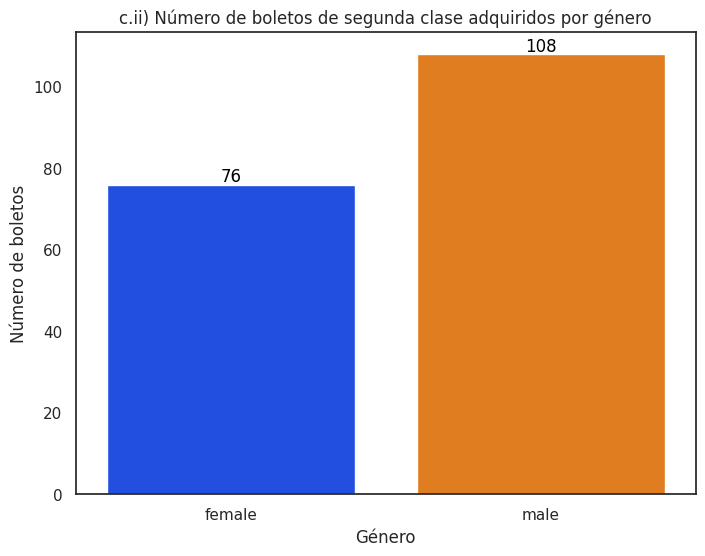

In [35]:
second_class = titanic[titanic['pclass'] == 2]

sns.set(style="white")

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Sexo', data=second_class, palette=paleta)

plt.title('c.ii) Número de boletos de segunda clase adquiridos por género')
plt.xlabel('Género')
plt.ylabel('Número de boletos')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height-2),
                ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

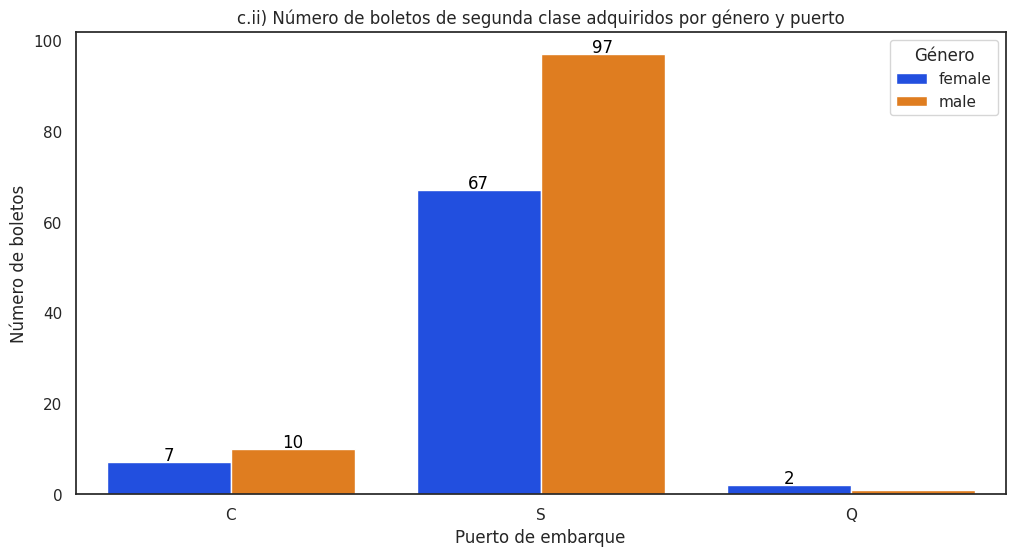

In [36]:
plt.figure(figsize=(12, 6))
ax=sns.countplot(x='embarked', hue='Sexo', data=second_class, palette=paleta)

plt.title('c.ii) Número de boletos de segunda clase adquiridos por género y puerto',)
plt.xlabel('Puerto de embarque')
plt.ylabel('Número de boletos')
plt.legend(title='Género')
# Añadir etiquetas con la frecuencia absoluta de boletos
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height-2),
                ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

<ipython-input-37-f5dead2b78a7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=second_class,


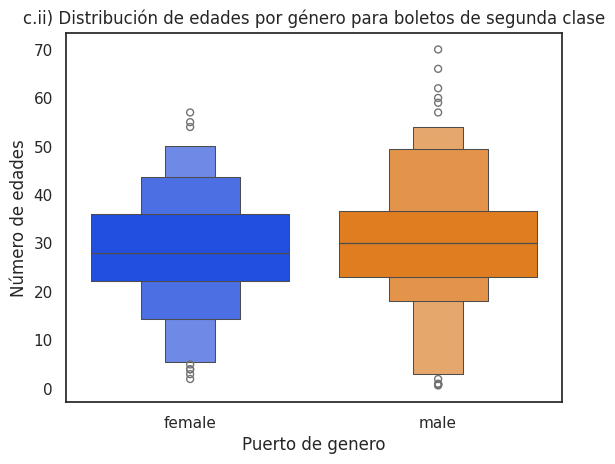

In [37]:
sns.boxenplot(data=second_class,
              x="Sexo",
              y="age",
              palette=paleta)

plt.title('c.ii) Distribución de edades por género para boletos de segunda clase')
plt.xlabel('Puerto de genero')
plt.ylabel('Número de edades')
plt.show()

c. ii. ¿Qué género adquirió más boletos de segunda clase?

Para los boletos de segunda clase, se observó que los hombres compraron más boletos, excepto en el puerto de Queenstown, donde apenas hubo ventas. Además, se pudo notar que las edades de hombres y mujeres eran similares.



<ipython-input-38-bc567d3a9534>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Sexo', data=thi_class, palette=paleta)


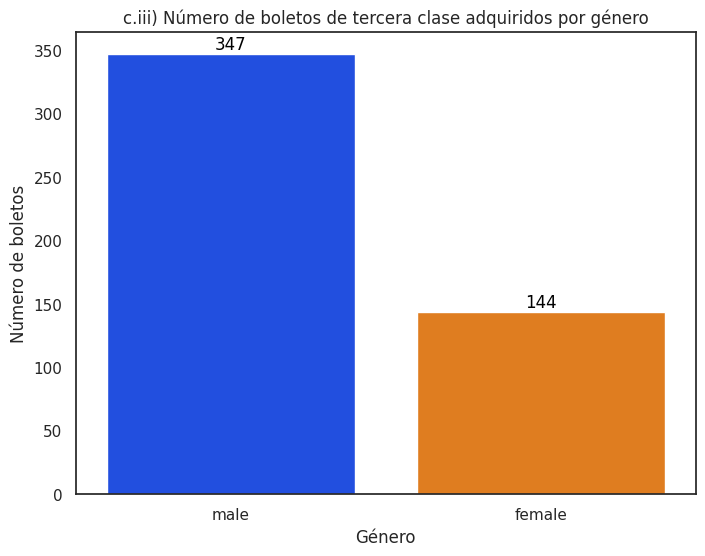

In [38]:
thi_class = titanic[titanic['pclass'] == 3]

sns.set(style="white")

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Sexo', data=thi_class, palette=paleta)

plt.title('c.iii) Número de boletos de tercera clase adquiridos por género')
plt.xlabel('Género')
plt.ylabel('Número de boletos')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height-5),
                ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

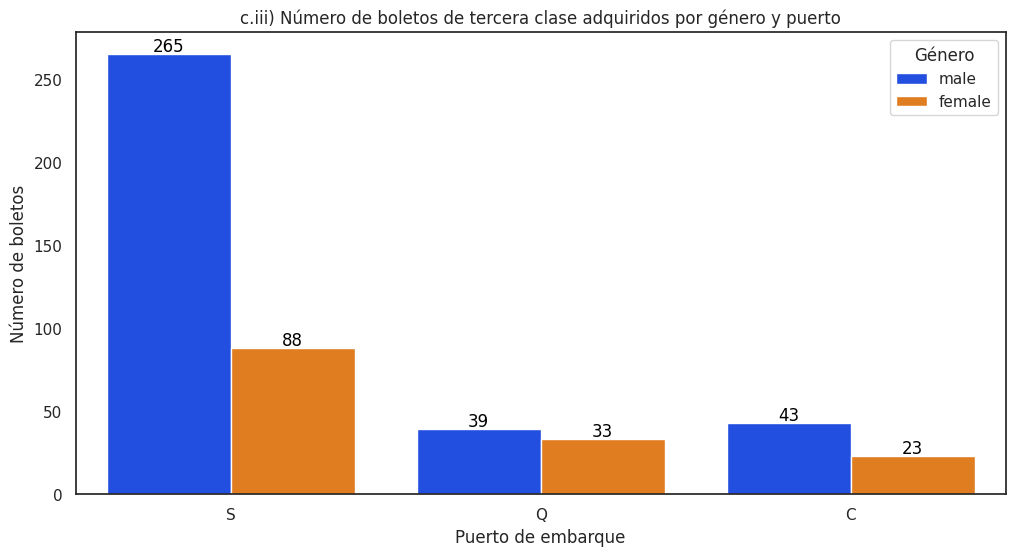

In [39]:
plt.figure(figsize=(12, 6))
ax=sns.countplot(x='embarked', hue='Sexo', data=thi_class, palette=paleta)

plt.title('c.iii) Número de boletos de tercera clase adquiridos por género y puerto')
plt.xlabel('Puerto de embarque')
plt.ylabel('Número de boletos')
plt.legend(title='Género')
# Añadir etiquetas con la frecuencia absoluta de boletos
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height-5),
                ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

<ipython-input-40-dab0057f4e96>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=thi_class,


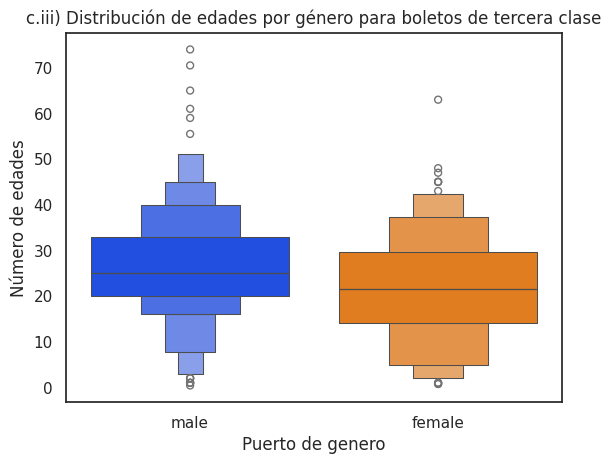

In [40]:
sns.boxenplot(data=thi_class,
              x="Sexo",
              y="age",
              palette=paleta)

plt.title('c.iii) Distribución de edades por género para boletos de tercera clase')
plt.xlabel('Puerto de genero')
plt.ylabel('Número de edades')
plt.show()


c. iii. ¿Qué género adquirió más boletos de tercera clase?

Los hombres adquirieron la mayoría de los boletos de tercera clase, destacando Southampton y Queenstown con diferencias de 226 y 55 boletos, respectivamente. En Cherbourg, la diferencia fue de 20 boletos, predominando aún los hombres. En cuanto a las edades, los compradores de boletos de tercera clase eran principalmente jóvenes mayores de 20 años y adultos jóvenes menores de 30.


In [42]:
sns.color_palette("bright")[1]

(1.0, 0.48627450980392156, 0.0)

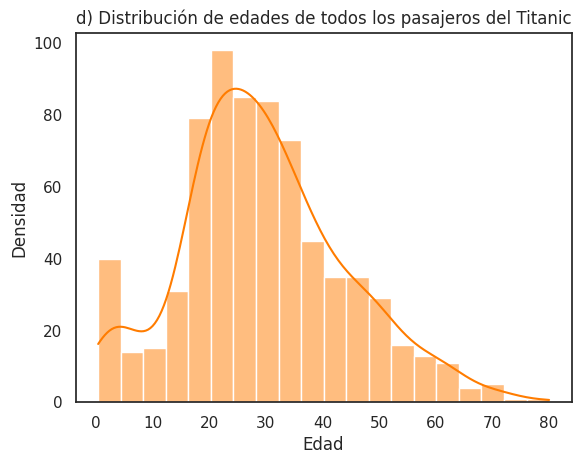

In [44]:
sns.histplot(data=titanic,
            x="age",
            kde=True,
            color=sns.color_palette("bright")[1])
plt.title('d) Distribución de edades de todos los pasajeros del Titanic')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.show()

<ipython-input-45-5b914d638acd>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=titanic,


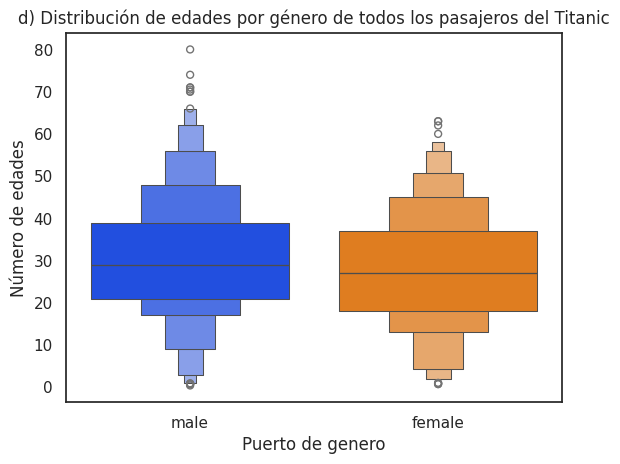

In [45]:
sns.boxenplot(data=titanic,
              x="Sexo",
              y="age",
              palette=paleta)

plt.title('d) Distribución de edades por género de todos los pasajeros del Titanic')
plt.xlabel('Puerto de genero')
plt.ylabel('Número de edades')
plt.show()

<ipython-input-46-e879a663fd92>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=titanic,


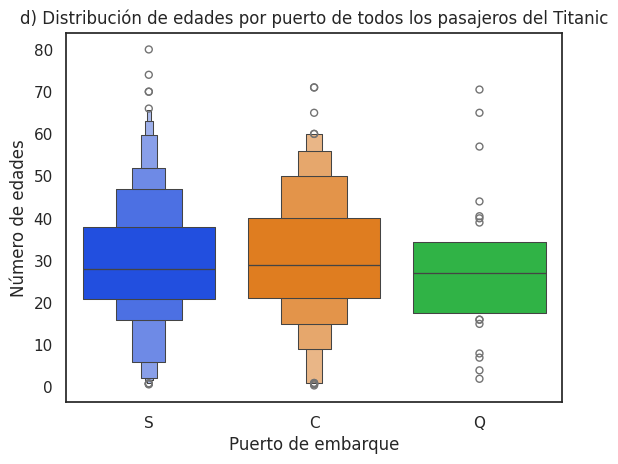

In [46]:
sns.boxenplot(data=titanic,
              x="embarked",
              y="age",
              palette=paleta)

plt.title('d) Distribución de edades por puerto de todos los pasajeros del Titanic')
plt.xlabel('Puerto de embarque')
plt.ylabel('Número de edades')
plt.show()

d. ¿De qué edades eran los pasajeros?

La mayoría de los pasajeros del Titanic eran adultos mayores de 20 años. Sin embargo, la proporción de mujeres adultas jóvenes fue un poco menor en comparación con la de los hombres. En cuanto a los puertos de embarque, los tres puertos registraron una mayor obtención de pasajeros adultos.

<ipython-input-47-a90ce052b0a1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='embarked', data=survivors, palette=paleta)


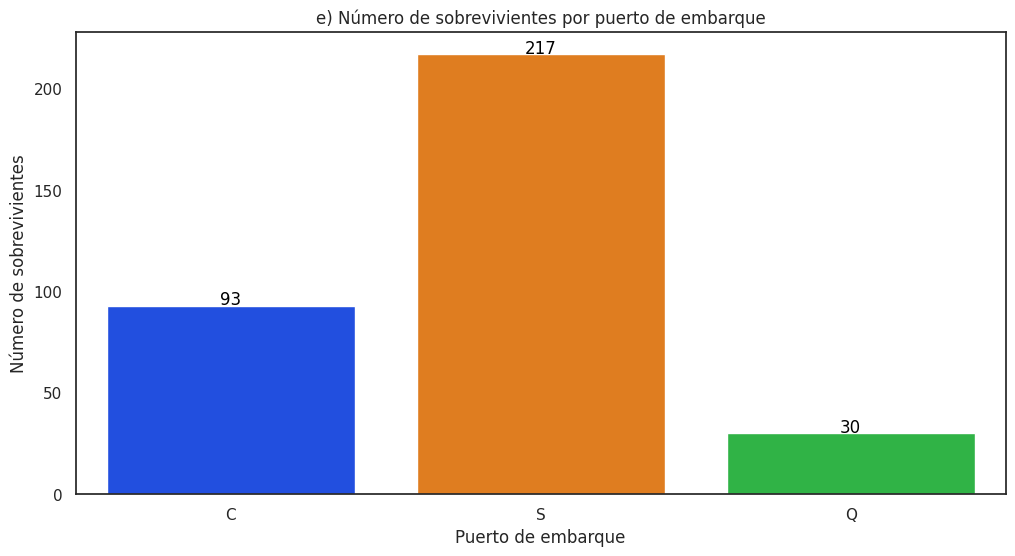

In [47]:
# Filtrar datos para incluir solo los sobrevivientes
survivors = titanic[titanic['Sobrevivió'] == 1]

plt.figure(figsize=(12, 6))
ax=sns.countplot(x='embarked', data=survivors, palette=paleta)
plt.title('e) Número de sobrevivientes por puerto de embarque')
plt.xlabel('Puerto de embarque')
plt.ylabel('Número de sobrevivientes')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height-5),
                ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()





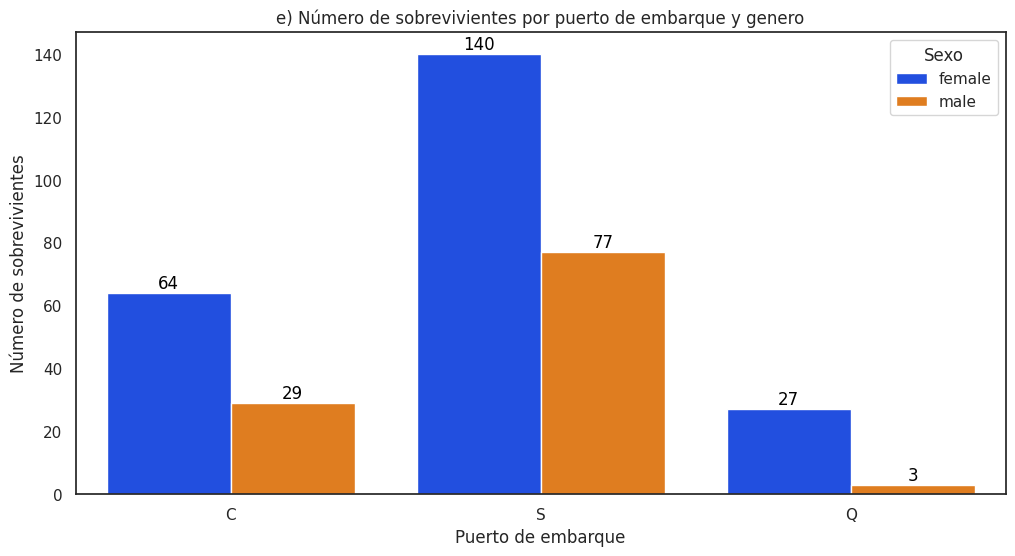

In [48]:


plt.figure(figsize=(12, 6))
ax=sns.countplot(x='embarked',hue="Sexo", data=survivors, palette=paleta)
plt.title('e) Número de sobrevivientes por puerto de embarque y genero')
plt.xlabel('Puerto de embarque')
plt.ylabel('Número de sobrevivientes')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height-2),
                ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()




<ipython-input-49-4a825526011f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=survivors,


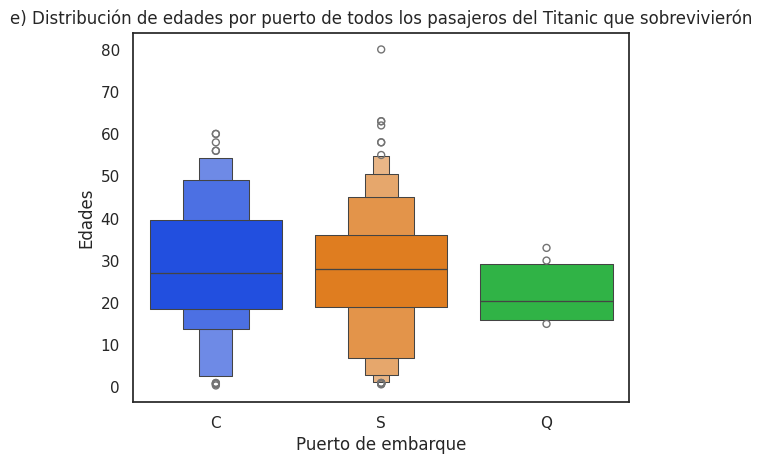

In [49]:
sns.boxenplot(data=survivors,
              x="embarked",
              y="age",
              palette=paleta)

plt.title('e) Distribución de edades por puerto de todos los pasajeros del Titanic que sobrevivierón')
plt.xlabel('Puerto de embarque')
plt.ylabel('Edades')
plt.show()


e. Los sobrevivientes, ¿De cuál puerto partieron?


La mayoría de los sobrevivientes del Titanic embarcaron en Southampton. Aunque, al analizar por género, se encontró que en Cherbourg y Queenstown la proporción de mujeres sobrevivientes fue mayor que la de hombres, con 35 y 24 mujeres respectivamente. En lasedades, cherbourg y Southampton tuvieron una distribución casi igual.



<ipython-input-50-dabd53bef70c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='alone', data=survivors, palette=paleta)
<ipython-input-50-dabd53bef70c>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Acompañados', 'Solos'])


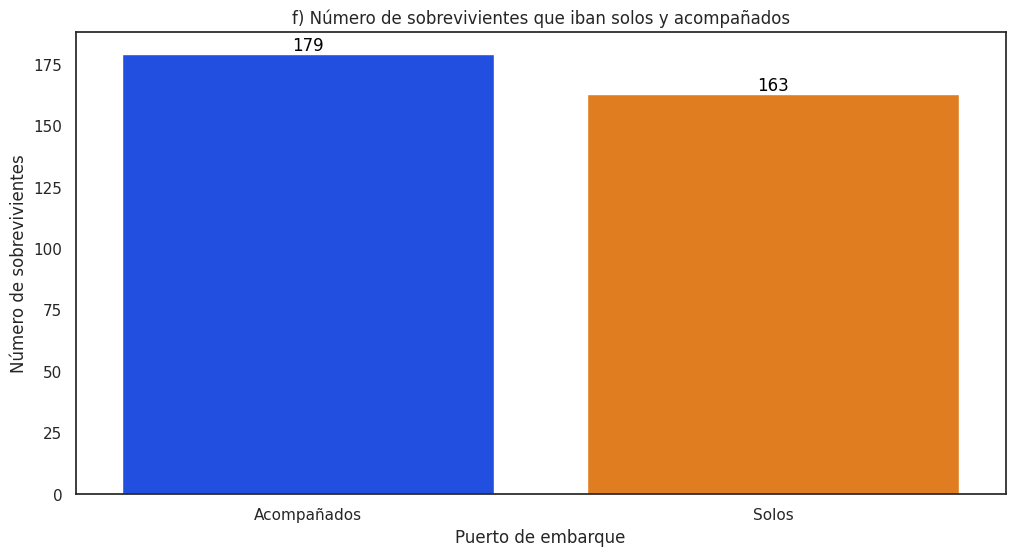

In [50]:
plt.figure(figsize=(12, 6))
ax=sns.countplot(x='alone', data=survivors, palette=paleta)
plt.title('f) Número de sobrevivientes que iban solos y acompañados')
plt.xlabel('Puerto de embarque')
plt.ylabel('Número de sobrevivientes')

ax.set_xticklabels(['Acompañados', 'Solos'])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height-3),
                ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


<ipython-input-51-15c61c1f7e4e>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Acompañados', 'Solos'])


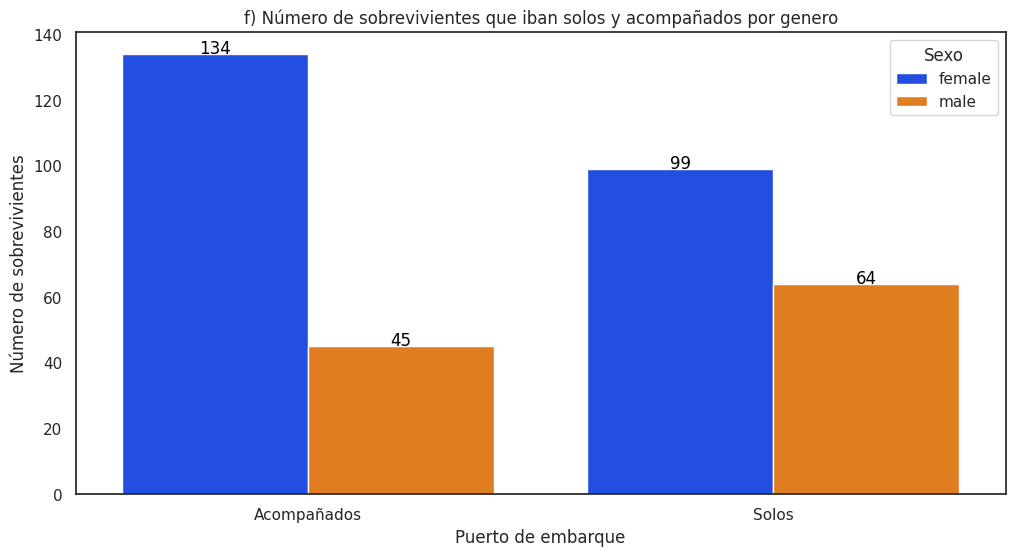

In [51]:
plt.figure(figsize=(12, 6))
ax=sns.countplot(x='alone',hue="Sexo", data=survivors, palette=paleta)
plt.title('f) Número de sobrevivientes que iban solos y acompañados por genero')
plt.xlabel('Puerto de embarque')
plt.ylabel('Número de sobrevivientes')

ax.set_xticklabels(['Acompañados', 'Solos'])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height-3),
                ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


<ipython-input-52-14ea6e5fc257>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=survivors,


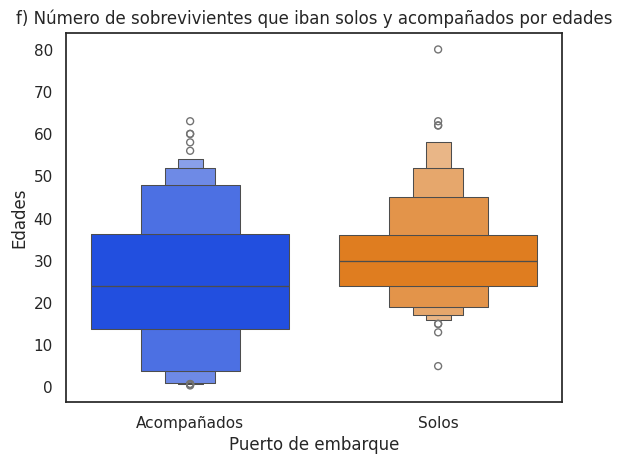

In [52]:
sns.boxenplot(data=survivors,
              x="alone",
              y="age",
              palette=paleta)

plt.title('f) Número de sobrevivientes que iban solos y acompañados por edades')
plt.xlabel('Puerto de embarque')
plt.ylabel('Edades')

plt.xticks([0, 1], ['Acompañados', 'Solos'])
plt.show()

f. Los sobrevivientes, ¿Quiénes iban viajando solos y quiénes acompañados?

Una proporción significativa de los sobrevivientes del Titanic viajaba acompañada, siendo 179 personas, especialmente mujeres y niños. Esto se refleja en la distribución de sobrevivientes por género, donde las personas del género femenino tuvieron mayores oportunidades de sobrevivir en comparación con los hombres. El número de hombres que viajaban solos o acompañados fue menor, con 45 y 64 respectivamente. Para finalizar, se observa que la edad de los hombres que viajaban solos era mayor a 25 años.

g) Conclusiones generales


En conclusión, el análisis detallado de los pasajeros del Titanic no solo revela las dinámicas de embarque y supervivencia, sino también las complejidades sociales y demográficas que definieron esta tragedia histórica. El puerto de Southampton fue el más concurrido, con una notable diversidad de hombres y mujeres adultos, reflejando un viaje predominantemente para personas maduras y familias. La distribución de boletos mostró que los hombres dominaron en las clases superiores y tercera clase, especialmente en Southampton, mientras que en Cherbourg, las mujeres adquirieron más boletos de primera clase.

La mayoría de los sobrevivientes partieron de Southampton, aunque las mujeres tuvieron mayores oportunidades de supervivencia en Cherbourg y Queenstown, sugiriendo diferencias en las estrategias de evacuación y la priorización de mujeres y niños en esos puertos. La proporción significativa de sobrevivientes viajaba acompañada, especialmente mujeres y niños, destacando las decisiones cruciales tomadas durante la evacuación.

Cada dato y detalle arroja luz sobre las vidas perdidas y las decisiones tomadas en un momento crucial de la historia marítima mundial, revelando historias fascinantes y desgarradoras sobre las vidas y decisiones de los pasajeros del Titanic.



